In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir="D:/Developer's Box/CODSOFT internship/image and video recognition/dataset/Original_Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization , Activation

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 176s 2s/step - loss: 3.4471 - accuracy: 0.0929
Epoch 2/30
81/81 [==============================] - 148s 2s/step - loss: 2.7312 - accuracy: 0.2080
Epoch 3/30
81/81 [==============================] - 146s 2s/step - loss: 2.3283 - accuracy: 0.3095
Epoch 4/30
81/81 [==============================] - 153s 2s/step - loss: 1.9502 - accuracy: 0.4137
Epoch 5/30
81/81 [==============================] - 153s 2s/step - loss: 1.6132 - accuracy: 0.5129
Epoch 6/30
81/81 [==============================] - 149s 2s/step - loss: 1.4065 - accuracy: 0.5714
Epoch 7/30
81/81 [==============================] - 143s 2s/step - loss: 1.1162 - accuracy: 0.6514
Epoch 8/30
81/81 [==============================] - 142s 2s/step - loss: 0.8498 - accuracy: 0.7397
Epoch 9/30
81/81 [==============================] - 144s 2s/step - loss: 0.6429 - accuracy: 0.8173
Epoch 10/30
81/81 [==============================] - 141s 2s/step - loss: 0.4735 - accuracy: 0.8673
Epoch 11/

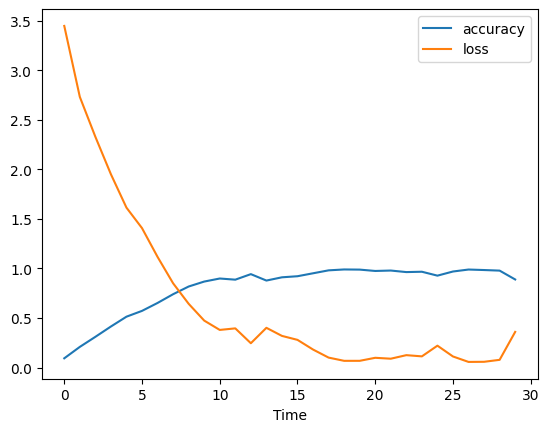

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

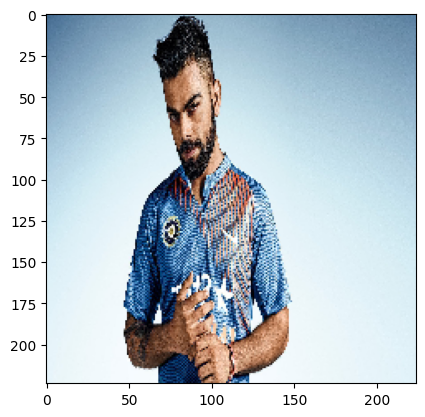

1/1 [==============================] - 0s 389ms/step
Actual: 4.jpg
Predicted: Virat Kohli


In [ ]:
predict_image("D:/Developer's Box/CODSOFT internship/image and video recognition/dataset/images_to_test/4.jpg")